## Table of Contents
<ul>
<li><a href="#introduction">Introduction</a></li>
<li><a href="#assess">Data Assessment</a></li>
<li><a href="#cleaning">Data Cleaning/Preprocessing</a></li>
<li><a href="#model">Models</a></li>
<li><a href="#Results">Results/Findings</a></li>
<li><a href="#sumbit">Submission</a></li>
</ul>

<a id='introduction'></a>
## Introduction
#### About Dataset
> The dataset contains 1460 observations and 81 features, with 79 explanatory variables describing (almost) every aspect of residential homes in Ames, Iowa. The dataset can be found https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/overview. The columns decription can be found https://www.kaggle.com/competitions/house-prices-advanced-regression-techniques/data?select=data_description.txt.
#### Objective
>The objective of this project is to build several linear regression model to predict the final price of each home and select the best.

### Preliminary Wrangling

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split

sns.set(font_scale = 1.3)
%matplotlib inline
rs = 123

In [2]:
# Loading train and test dataset
df = pd.read_csv('train.csv')
# df_test = pd.read_csv('test.csv')

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


#### Splitting Data into X(features) and Y(target)

In [4]:
x = df.drop(columns=['Id', 'SalePrice'], axis=1)
y = df['SalePrice']

#### Split Data into train and test data

In [84]:
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=rs, test_size=0.1)

<a id='assess'></a>
### Data Assessment

In [85]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1314 entries, 302 to 1389
Data columns (total 79 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   MSSubClass     1314 non-null   int64  
 1   MSZoning       1314 non-null   object 
 2   LotFrontage    1089 non-null   float64
 3   LotArea        1314 non-null   int64  
 4   Street         1314 non-null   object 
 5   Alley          81 non-null     object 
 6   LotShape       1314 non-null   object 
 7   LandContour    1314 non-null   object 
 8   Utilities      1314 non-null   object 
 9   LotConfig      1314 non-null   object 
 10  LandSlope      1314 non-null   object 
 11  Neighborhood   1314 non-null   object 
 12  Condition1     1314 non-null   object 
 13  Condition2     1314 non-null   object 
 14  BldgType       1314 non-null   object 
 15  HouseStyle     1314 non-null   object 
 16  OverallQual    1314 non-null   int64  
 17  OverallCond    1314 non-null   int64  
 18  YearBu

In [86]:
x_train.describe().T

,count,mean,std,min,25%,50%,75%,max
MSSubClass,1314.0,56.472603,42.036646,20.0,20.00,50.0,70.00,190.0
LotFrontage,1089.0,69.641873,23.031794,21.0,59.00,69.0,80.00,313.0
LotArea,1314.0,10273.261035,8997.895541,1300.0,7500.00,9391.0,11509.00,215245.0
OverallQual,1314.0,6.076104,1.392612,1.0,5.00,6.0,7.00,10.0
OverallCond,1314.0,5.570015,1.112848,1.0,5.00,5.0,6.00,9.0
YearBuilt,1314.0,1970.995434,30.198127,1872.0,1953.00,1972.0,2000.00,2010.0
YearRemodAdd,1314.0,1984.659056,20.639754,1950.0,1966.25,1993.0,2004.00,2010.0
MasVnrArea,1307.0,102.514155,178.301563,0.0,0.00,0.0,165.50,1378.0
BsmtFinSF1,1314.0,441.425419,459.276687,0.0,0.00,376.0,704.75,5644.0
BsmtFinSF2,1314.0,47.067732,163.952408,0.0,0.00,0.0,0.00,1474.0


In [87]:
x_train.describe().T[df.describe().T['min']==0].index

Index(['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF',
       '2ndFlrSF', 'LowQualFinSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal'],
      dtype='object')

#### Visualizing Numerical Columns

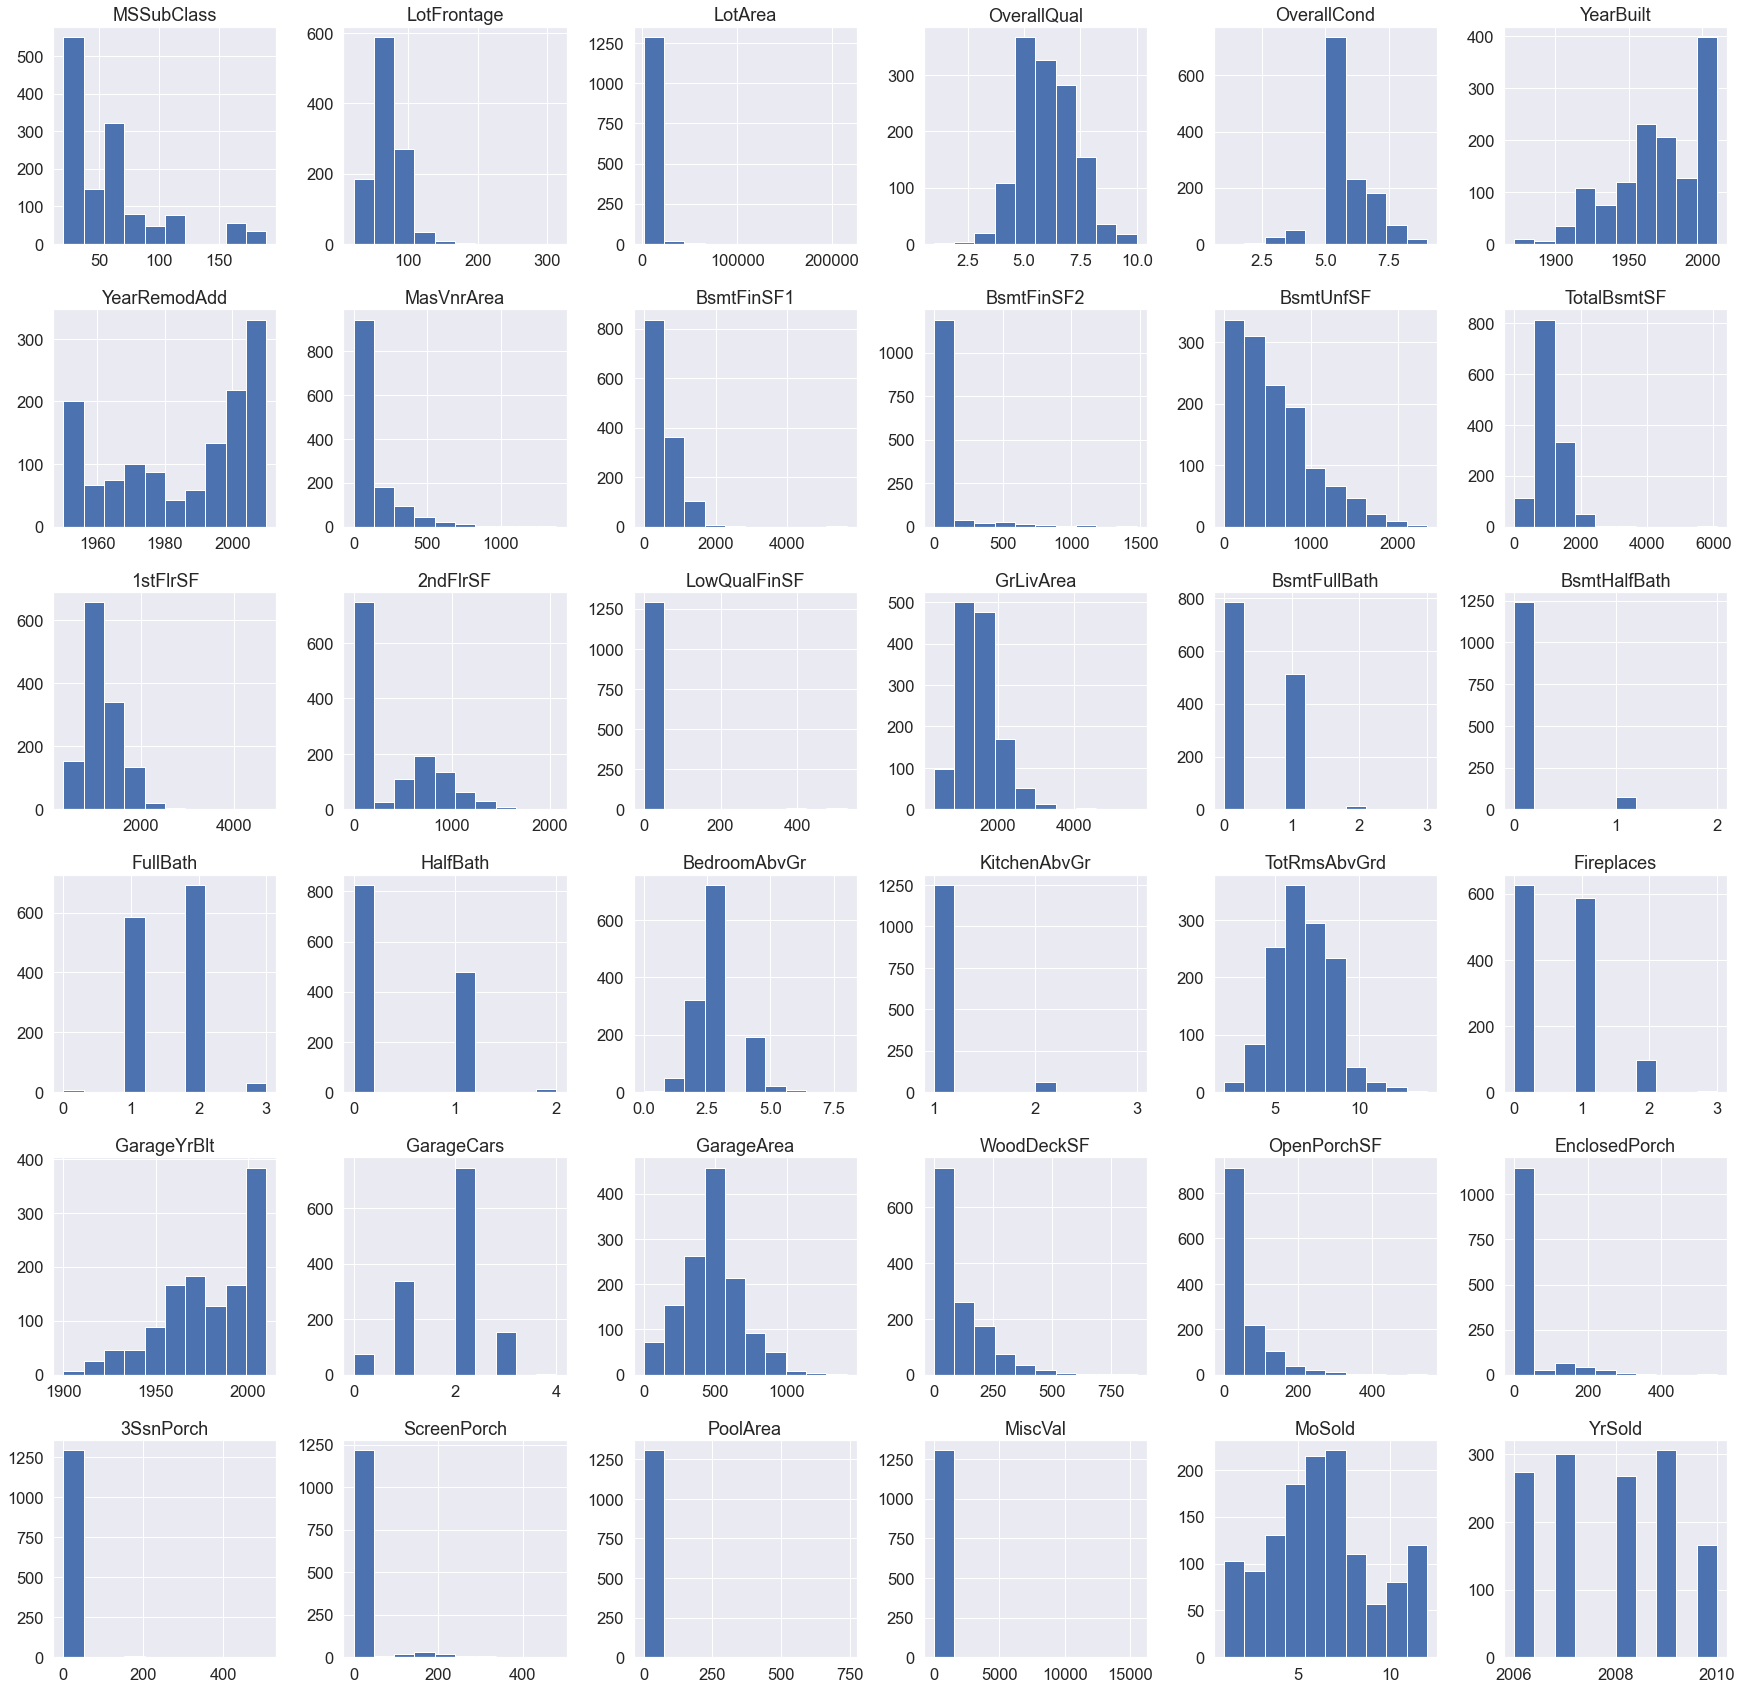

In [88]:
sns.set(font_scale = 1.5)
x_train.hist(figsize = (30, 30));

**Insight**
- The columns listed below has a min value equal to 0. This Zero also mean unavailable:
>MasVnrArea, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, 2ndFlrSF, LowQualFinSF, BsmtFullBath, BsmtHalfBath, FullBath, HalfBath, BedroomAbvGr, KitchenAbvGr, Fireplaces, GarageCars, GarageArea, WoodDeckSF, OpenPorchSF, EnclosedPorch, 3SsnPorch, ScreenPorch, PoolArea, MiscVal.

In [89]:
# Sorting columns with null values
columns_null = [cols for cols in x_train.columns if x_train[cols].isnull().sum() > 0]
x_train[columns_null].isnull().sum().sort_values(ascending=False)

PoolQC          1307
MiscFeature     1264
Alley           1233
Fence           1055
FireplaceQu      627
LotFrontage      225
GarageType        73
GarageYrBlt       73
GarageFinish      73
GarageQual        73
GarageCond        73
BsmtExposure      35
BsmtFinType1      34
BsmtFinType2      34
BsmtCond          34
BsmtQual          34
MasVnrArea         7
MasVnrType         7
Electrical         1
dtype: int64

### **`Data Assessment Results`**
- **Fill NaN with 0:** LotFrontage, MasVnrArea, GarageYrBlt, BsmtFinSF1, BsmtFinSF2, BsmtUnfSF, TotalBsmtSF, BsmtFullBath, BsmtHalfBath, GarageCars, GarageArea
- **MasVnrType:** Convert None to NaN
- **Label Encode:** Street, Utilities, CentralAir
- **One-Hot Encode:** MSZoning, Alley, LotShape, LandContour, LotConfig, LandSlope, Neighborhood, Condition1, Condition2, BldgType, HouseStyle, RoofStyle, RoofMatl, Exterior1st, Exterior2nd, MasVnrType, ExterQual, ExterCond, Foundation, BsmtQual, BsmtCond, BsmtExposure, BsmtFinType1, BsmtFinType2, Heating, HeatingQC, Electrical, KitchenQual, Functional, FireplaceQu, GarageType, GarageFinish, GarageQual, GarageCond, PavedDrive, PoolQC, Fence, MiscFeature, SaleType, SaleCondition

### Building model Pipeline

In [90]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler, FunctionTransformer
from sklearn.pipeline import Pipeline

In [91]:
cat_cols = [cols for cols in x_train.columns if x_train[cols].dtype == 'object']
print(cat_cols)

['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition']


In [92]:
# Creating a function to replace Nan with 0
def fill_0(df):
    df = df.fillna(0)
    return df

# Creating a function to replace 'None' with NaN
def None_replace(df):
    df = df.replace('None', np.nan)
    return df

In [93]:
fill_zero = FunctionTransformer(fill_0)
None_rep = FunctionTransformer(None_replace)

In [94]:
numeric_pipeline = Pipeline(steps=[
    ('fill_0', fill_zero),
    ('impute', SimpleImputer(strategy='mean')),
    ('scale', MinMaxScaler())
])

categorical_pipeline = Pipeline(steps=[
    ('None_replace', None_rep),
    ('one-hot', OneHotEncoder(handle_unknown='ignore', sparse=False)),
    ('impute', SimpleImputer(strategy='most_frequent'))
])

In [95]:
numerical_features = x_train.select_dtypes(include='number').columns.tolist()

In [96]:
categorical_features = x_train.select_dtypes(exclude='number').columns.tolist()

In [97]:
from sklearn.compose import ColumnTransformer

full_processor = ColumnTransformer(transformers=[
    ('number', numeric_pipeline, numerical_features),
    ('category', categorical_pipeline, categorical_features)
])

In [98]:
full_processor.fit_transform(x_test).shape

(146, 239)

In [99]:
full_processor.fit_transform(x_train).shape

(1314, 302)

## MODELS

#### Define a function to return root-mean squared error(RMSE)

In [100]:
def rmse(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

In [101]:
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from sklearn.metrics import mean_absolute_error

lasso = Lasso(alpha=0.1)

lasso_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', lasso)
])

In [102]:
lasso_pipeline.fit(x_train, y_train);

In [103]:
preds = lasso_pipeline.predict(x_test)
rmse(y_test, preds)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

##### MasVnrType : Convert None to NaN then one hot

#### Importing Libraries

In [ ]:
from sklearn.linear_model import LinearRegression, ElasticNet, LassoCV, RidgeCV, ElasticNetCV

### Linear Regression

In [55]:
lin_model = LinearRegression()

lin_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', lin_model)
])

lin_pipeline.fit(x_train, y_train);

lin_pred= lin_pipeline.predict(x_test)
lin_rmse = rmse(y_test, lin_pred)
print('RMSE:', lin_rmse)

RMSE: 154776220866059.88


### Lasso Regression

In [54]:
alpha1 = [0.005, 0.05, 0.1, 0.3, 1, 5, 20, 50, 80, 100, 120, 140]

lassorCV = LassoCV(alphas=alpha1, max_iter= 5e4,cv=5)

lassoCV_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', lassorCV)
])

lassoCV_pipeline.fit(x_train, y_train)

lassorCV_rmse = rmse(y_test, lassoCV_pipeline.predict(x_test))
print('alpha:',lassorCV.alpha_)
print('RMSE:',lassorCV_rmse)

alpha: 140.0
RMSE: 25888.0059307351


### Ridge Regression

In [58]:
alpha2 = [0.005, 0.05, 0.1, 0.3, 1, 3, 5, 10, 15, 30, 50, 80, 100]

ridgeCV = RidgeCV(alphas=alpha2, cv=5)

ridgeCV_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', ridgeCV)
])

ridgeCV_pipeline.fit(x_train, y_train)

ridgeCV_rmse = rmse(y_test, ridgeCV_pipeline.predict(x_test))
print('alpha:',ridgeCV.alpha_)
print('RMSE:',ridgeCV_rmse)

alpha: 10.0
RMSE: 27690.594524212545


### ElasticNet Regression

In [60]:
l1_ratios = np.linspace(0.1, 0.9, 9)

elasticNetCV = ElasticNetCV(alphas=alpha1, l1_ratio=l1_ratios,
                            max_iter= 1e4,cv=5)

elasticNetCV_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', elasticNetCV)
])


elasticNetCV_pipeline.fit(x_train, y_train)

elasticNetCV_rmse = rmse(y_test, elasticNetCV_pipeline.predict(x_test))
print('alpha:',elasticNetCV.alpha_)
print('l1 ratio:', elasticNetCV.l1_ratio_)
print('RMSE:',elasticNetCV_rmse)

alpha: 0.05
l1 ratio: 0.7000000000000001
RMSE: 28023.257796604226


### LightGBM Regression

In [61]:
from lightgbm import LGBMRegressor

lgbmRegressor = LGBMRegressor()

lgbmRegressor_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', lgbmRegressor)
])

lgbmRegressor_pipeline.fit(x_train, y_train)
lgbm_rmse = rmse(y_test, lgbmRegressor_pipeline.predict(x_test))
print('RMSE:', lgbm_rmse)

RMSE: 26068.192484160576


### Gradient Boosting Regression

In [64]:
from sklearn.ensemble import GradientBoostingRegressor

gbRegressor = GradientBoostingRegressor()

gbRegressor_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', gbRegressor)
])


gbRegressor_pipeline.fit(x_train, y_train)
gb_rmse = rmse(y_test, gbRegressor_pipeline.predict(x_test))
gb_mae = mean_absolute_error(y_test, gbRegressor_pipeline.predict(x_test))
print('RMSE:', gb_rmse)
print('MAE:',  gb_mae)

RMSE: 24561.230735793735
MAE: 15316.351670177088


### CatBoost Regression

In [67]:
from catboost import CatBoostRegressor

cbRegressor = CatBoostRegressor(silent=True)

cbRegressor_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', cbRegressor)
])

cbRegressor_pipeline.fit(x_train, y_train)
cb_rmse = rmse(y_test, cbRegressor_pipeline.predict(x_test))
cb_mae = mean_absolute_error(y_test, cbRegressor_pipeline.predict(x_test))

print('RMSE:', cb_rmse)
print('MAE:',  cb_mae)

RMSE: 22452.727347878368
MAE: 13617.268869016669


### Bayesian Ridge

In [70]:
from sklearn.linear_model import BayesianRidge

brRegressor = BayesianRidge()

brRegressor_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', brRegressor)
])

brRegressor_pipeline.fit(x_train, y_train)
br_rmse = rmse(y_test, brRegressor_pipeline.predict(x_test))
br_mae = mean_absolute_error(y_test, brRegressor_pipeline.predict(x_test))
print('RMSE:', br_rmse)
print('MAE:',  br_mae)

RMSE: 27408.51173455787
MAE: 18072.28804036519


### Random Forest Regression

In [72]:
from sklearn.ensemble import RandomForestRegressor

rfRegressor = RandomForestRegressor(random_state=19)

rfRegressor_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', rfRegressor)
])

rfRegressor_pipeline.fit(x_train, y_train)
rf_rmse = rmse(y_test, rfRegressor_pipeline.predict(x_test))
rf_mae = mean_absolute_error(y_test, rfRegressor_pipeline.predict(x_test))
print('RMSE:', rf_rmse)
print('MAE:',  rf_mae)

RMSE: 26056.739229195056
MAE: 16465.19598173516


### Extra Trees Regressor

In [73]:
from sklearn.ensemble import ExtraTreesRegressor

extRegressor = ExtraTreesRegressor(random_state=19)

extRegressor_pipeline = Pipeline(steps=[
    ('preprocess', full_processor),
    ('model', extRegressor)
])

extRegressor_pipeline.fit(x_train, y_train)
ext_rmse = rmse(y_test, extRegressor_pipeline.predict(x_test))
ext_mae = mean_absolute_error(y_test, extRegressor_pipeline.predict(x_test))
print('RMSE:', ext_rmse)
print('MAE:',  ext_mae)

RMSE: 27064.93674038491
MAE: 16903.713515981734


<a id='Results'></a>
## Results/Finding

### Comparing the RMSE calculation from all models

In [74]:
rmse_val =  [lin_rmse, lassorCV_rmse, ridgeCV_rmse, elasticNetCV_rmse, lgbm_rmse, 
             gb_rmse, cb_rmse, br_rmse, rf_rmse, ext_rmse]
labels = ['Linear', 'Lasso', 'Ridge', 'ElasticNet', 'LightGBM', 'Gradient Boosting', 
         'CatBoost', 'Bayesian Ridge', 'Random Forest', 'Extra Trees']

rmse_df = pd.Series(rmse_val, index=labels).to_frame()
rmse_df.rename(columns={0 : 'RMSE'}, inplace=True)
rmse_df.sort_values(by='RMSE')

,RMSE
CatBoost,2.245273e+04
Gradient Boosting,2.456123e+04
Lasso,2.588801e+04
Random Forest,2.605674e+04
LightGBM,2.606819e+04
Extra Trees,2.706494e+04
Bayesian Ridge,2.740851e+04
Ridge,2.769059e+04
ElasticNet,2.802326e+04
Linear,1.547762e+14


**RESULT:** The best model for is the model with the lowest RMSE score which is the **CatBoost regression model**.

<a id='sumbit'></a>
## Submission


In [80]:
df_test = pd.read_csv('test.csv')

In [81]:
X_test = df_test.drop('Id', axis=1)

In [82]:
output = pd.DataFrame(columns=["Id","SalePrice"])
output["Id"] = df_test.Id
output["SalePrice"] = cbRegressor_pipeline.predict(X_test)
output

,Id,SalePrice
0,1461,124201.047957
1,1462,172884.622848
2,1463,189937.301476
3,1464,190720.089689
4,1465,188242.227827
...,...,...
1454,2915,80899.859363
1455,2916,82892.500497
1456,2917,170927.018441
1457,2918,123187.831120


In [83]:
output.to_csv('submission.csv', index=False)
print('Submission succesful!')

Submission succesful!


<a id='model'></a>
## **MODELS**